<a href="https://colab.research.google.com/github/ChrisMath26/Fisica-Computacional/blob/main/RD/Reacci%C3%B3n_Difusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación de Reacción Difusión

Fenómenos interesantes ocurren cuando se combinan dinámicas temporales con difusión espacial. Uno de los ejemplos es la formación de patrones de Turing que se producen con ecuaciones del tipo

$$
\frac{\partial a}{\partial t} = D_a \nabla^2 a + f(a,b) \\
\frac{\partial b}{\partial t} = D_b \nabla^2 a + g(a,b) \\
$$

Cuando $f(a,b)$ y $g(a,b)$ describen la interacción de variables activadoras $[a(\mathbf{r},t)]$ / inihibidoras $[b(\mathbf{r},t)]$ se conoce como una ecuación de rección/difusión.

Bajo las condiciones adecuadas, este sistema de ecuaciones da como resultado patrones o inestabilidades de Turing. Comenzamos nuestro análisis asumiendo que en ausencia de difusión el sistema evoluciona en el tiempo a un punto estacionario $(a_0,b_0)$. Si definimos un peqeuña perturbación en torno a ese punto estacionario así:

$$
\mathbf{q} = (\delta a,\delta b)^T= (a_0 - a, b_0 - b)^T
$$

La dinámica temporal de esa perturbación en el tiempo está dada por:

$$
\dot{\mathbf{q}} = \mathbf{J}\mathbf{q}
$$

Donde $\mathbf{J}$ es la matriz Jacobiana

$$
\mathbf{J} =
\begin{pmatrix}
\frac{\partial f}{\partial a} & \frac{\partial f}{\partial b}  \\
\frac{\partial g}{\partial a} & \frac{\partial g}{\partial b}
\end{pmatrix}
\vert_{(a_0,b_0)}
$$

Esa perturbación al incluir la dinámica espacial adquiere la forma:

$$
\frac{\partial \mathbf{q}}{\partial t} = \mathbf{D} \nabla^2 \mathbf{q} + \mathbf{J} \mathbf{q}
$$

Aquí:

$$
\mathbf{D} =
    \begin{pmatrix}
    D_a & 0 \\
    0 & D_b
    \end{pmatrix}
$$


Aplicando transformada de Fourier $\hat{\mathbf{q}}$

$$
\frac{d \mathbf{\hat{q}}}{d t} = - k^2 \mathbf{D} \mathbf{\hat{q}} + \mathbf{J} \mathbf{\hat{q}}
$$

la ecuación de arriba puede ser reordenada como:

$$
\frac{d \mathbf{\hat{q}}}{d t} = \mathbf{A} \mathbf{\hat{q}}
$$

La ecuación arriba descrita rige la dinámica de los modos de Fourier de las soluciones espacio-temporales. Este es un problema de autovalores cuya estabilidad está descrita por los autovalores de $\mathbf{A}$ que es simplemente

$$
\mathbf{A} =
\begin{pmatrix}
-k^2 D_a + f_a & f_b \\
g_a & -k^2 D_b + g_b
\end{pmatrix}
$$

El problema de autovalores es

$$
det(\mathbf{A}-I \lambda(k)) = 0
$$

Obsérvese que $\lambda(k)$ es función de $k$ que representa los modos de Fourier de la solcuión y por tanto es una variable independiente.  El valor $k = 0$ representa el modo homogéneo espacial, mientras que $k>0$ representa modos que dan lugar a patrones de Turing. El objetivo es hallar la función $\lambda(k)$ que resuelve el problema de auotvalores. Esta función se conoce como la relación de dispersión. La estabilidad de las solcuiones espacio-temporales está dada por la parte real del autovalor máximo de la relación de dispersión de acuerdo a las siguientes soluciones:

* $Re(\lambda_{max})<0 \quad \forall k$: Estado homgéneo estable
* $Re(\lambda_{max})>0 \; for \; k = 0$: Estado homgéneo inestable
* $Re(\lambda_{max})>0 \; for \; k > 0$: Patrones de Turing


Considere el sistema con difusión siguiente

$$
\frac{\partial a}{\partial t} = D_a \nabla^2 a + a-a^3-b+\alpha \\
\frac{\partial b}{\partial t} = D_b \nabla^2 b + \beta(a-b)
$$

Considere una geomtería 1D sobre una línea de $L = 100m$, $dx = 1$, $dt = 0.001$, $D_a = 1$, $D_b = 100$, $\alpha = -0.005$ y $\beta = 10$. Asuma condiciones de frontera periódicas y una condición inicial $a(x,0)=b(x,0)=0.1$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
# Parámetros del problema
L = 100  # Longitud del dominio en metros
dx = 1  # Paso espacial
dt = 0.001  # Paso temporal
Da = 1  # Coeficiente de difusión para 'a'
Db = 100  # Coeficiente de difusión para 'b'
alfa = -0.005  # Parámetro alfa
beta = 10  # Parámetro beta
x = np.arange(0, L, dx)  # Coordenadas espaciales

# Inicialización de las variables
a = 0.1 * np.random.rand(L)
b = 0.1 * np.random.rand(L)
#Inicializo las variables con respectiva CI
#a = 0.1 * np.ones_like(x) #ones_like me rellena un vector de 1 del tamaño del vector x
#b = 0.1 * np.ones_like(x)
#Inicializo las variables con respectiva CI
aOld = np.copy(a)
bOld = np.copy(b)

# Función para calcular el laplaciano en 1D
def laplaciano1D(X, dx):
    return (np.roll(X, 1) + np.roll(X, -1) - 2 * X) / dx**2
t = 0
tFinal = 15
cont = 0

#Para la animacion
n_frames = int(tFinal / dt)  # Número de frames calculado
matriz_a = []

while t < tFinal:
  a = aOld + dt*(Da*laplaciano1D(aOld, dx) + aOld-aOld**3-bOld+alfa)
  b = bOld + dt*(Db*laplaciano1D(bOld, dx) + beta*(aOld-bOld))
  aOld = np.copy(a)
  bOld = np.copy(b)
  t += dt
  cont += 1
  if cont % 500 == 0: # el estado de a solo se guarda cada 500 pasos temporales.
        matriz_a.append(np.copy(a))
# Convertir la lista de 'a' en una matriz NumPy
matriz_a = np.array(matriz_a)

# Ajustar configuración para la animación
rc('animation', html='html5')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 6))

# Función de actualización para la animación
def update(i):
    ax.clear()
    ax.plot(np.arange(0, L, dx ), matriz_a[i], "-b")
    ax.set_title('Difusión de Calor en un Contenedor de acero')
    ax.set_xlabel('Posición (m)')
    ax.set_ylabel('Temperatura (°C)')
    ax.grid(True)
    ax.axis([0, L, -20, 20])
    return ax

# Crear la animación
anim = animation.FuncAnimation(fig, update, frames=range(len(matriz_a)), interval=200)

# Cerrar el plot para evitar que se muestre una imagen estática
plt.close()

# Mostrar la animación en Google Colab
anim
#Falta animar



Para el mismo ejercicio anterior considere una geometría 2D usando $D_a = 1$, $D_b = 100$, $\alpha = -0.005$ y $\beta = 10$. Use un método FTCS para solucionar el problema

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Función para calcular el laplaciano en 2D
def laplaciano2D(X, dx):
    laplace = (np.roll(X, 1, axis=0) + np.roll(X, -1, axis=0) +
               np.roll(X, 1, axis=1) + np.roll(X, -1, axis=1) -
               4 * X) / dx**2
    return laplace

# Constantes
L = 100  # Tamaño del dominio
dx = dy = 1  # Paso espacial
dt = 0.001  # Paso temporal

# Difusión
Da = 1
Db = 100

# Parámetros alfa y beta
alfa = -0.005
beta = 10

# Inicialización de las variables con condiciones iniciales
a = 0.1 * np.random.rand(L, L)
b = 0.1 * np.random.rand(L, L)

aOld = np.copy(a)
bOld = np.copy(b)

# Parámetros de la simulación
tf = 15  # Tiempo final
t = 0  # Tiempo inicial
cont = 0
n_frames = int(tf / dt)  # Número de frames calculado
matriz_a = []

# Bucle para resolver las ecuaciones de difusión y reacción en 2D
while t < tf:
    a = aOld + dt * (Da * laplaciano2D(aOld, dx) + aOld - aOld**3 - bOld + alfa)
    b = bOld + dt * (Db * laplaciano2D(bOld, dx) + (aOld - bOld) * beta)

    # Actualizar las variables
    aOld = np.copy(a)
    bOld = np.copy(b)

    t += dt
    cont += 1
    if cont % 500 == 0:
        matriz_a.append(np.copy(a))

# Convertir la lista de 'a' en una matriz NumPy
matriz_a = np.array(matriz_a)

# Ajustar configuración para la animación
rc('animation', html='html5')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 6))

# Función de actualización para la animación
def update(i):
    ax.clear()  # Limpiar la gráfica para el nuevo frame
    img = ax.imshow(matriz_a[i], cmap='viridis', extent=[0, L, 0, L], vmin=-1, vmax=1)
    ax.set_title(f'Difusión y reacción en 2D - Frame {i}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return [img]

# Crear la animación
anim = animation.FuncAnimation(fig, update, frames=range(len(matriz_a)), interval=100)

# Cerrar el plot para evitar que se muestre una imagen estática
plt.close()

# Mostrar la animación en Google Colab
anim


El sistema ASDM en forma simplificada adquiere la forma

$$
\frac{\partial a}{\partial t} = d\nabla^2 a + a^2s - a \\
\frac{\partial s}{\partial t} = \nabla^2 s + \mu(1-a^2s)
$$

Calcule la relación de dispersión para los siguientes parámetros

$(\mu,d)=(1.5,0.8), \; (1.5,0.05), \; (0.5, 0.05) \; (0.5, 0.8)$. Qué comportamientos espera con las relaciones de dispersión obtenidas? Muestre la simulación numérica en cada caso. Use $L = 100$, $dx = dy = 1$ y $h = 0.001$

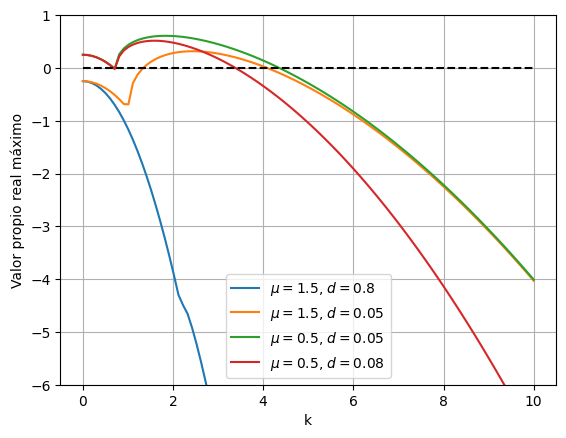

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dispersion(miu, d):
    ks = np.linspace(0, 10, 100)
    maxVal_k = np.zeros(len(ks))
    for i in range(len(ks)):
        k = ks[i]
        A = np.array([[1 - d * k**2, 1], [-2 * miu, -miu - k**2]])
        Lambda, _ = np.linalg.eig(A) #_ captura el segundo valor devuelto, que son los vectores propios, pero no se usa en este caso.
        maxVal_k[i] = max(np.real(Lambda))
    plt.plot(ks, maxVal_k, label=f'$\mu={miu}$, $d={d}$')
#parámetros (miu, d) a evaluar
parametros = [[1.5, 0.8], [1.5, 0.05], [0.5, 0.05], [0.5, 0.08]]
plt.figure()
plt.grid(True)
plt.ylim([-6, 1])
for miu, d in parametros:
    dispersion(miu, d)
plt.plot([0, 10], [0, 0], '--', color='black')
plt.legend([f'$\mu={miu}$, $d={d}$' for miu, d in parametros])
plt.xlabel('k')
plt.ylabel('Valor propio real máximo')
plt.show()

#$Tomando:\\miu = 0.5, d = 0.05$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Función para calcular el laplaciano en 2D
def laplaciano2D(X, dx):
    laplace = (np.roll(X, 1, axis=0) + np.roll(X, -1, axis=0) +
               np.roll(X, 1, axis=1) + np.roll(X, -1, axis=1) -
               4 * X) / dx**2
    return laplace

# Constantes
L = 100  # Tamaño del dominio
dx = dy = 1  # Paso espacial
dt = 0.001  # Paso temporal

# Difusión
Da = d
Db = 1

# Parámetros miu y d
miu = 0.5
d = 0.05

# Inicialización de las variables con condiciones iniciales
a = 1 * np.random.rand(L, L)
s = 1 * np.random.rand(L, L)

aOld = np.copy(a)
sOld = np.copy(s)

# Parámetros de la simulación
tf = 15  # Tiempo final
t = 0  # Tiempo inicial
cont = 0
n_frames = int(tf / dt)  # Número de frames calculado
matriz_a = []

# Bucle para resolver las ecuaciones de difusión y reacción en 2D
while t < tf:
    a = aOld + dt * (d * laplaciano2D(aOld, dx) + aOld**2 * sOld - aOld)
    s = sOld + dt * (laplaciano2D(sOld, dx) + miu * (1 - aOld**2 * sOld))

    # Actualizar las variables
    aOld = np.copy(a)
    sOld = np.copy(s)

    t += dt
    cont += 1
    if cont % 500 == 0:
        matriz_a.append(np.copy(a))  # Añadir copia de 'a' a la lista

matriz_a = np.array(matriz_a)

rc('animation', html='html5')

fig, ax = plt.subplots(figsize=(6, 6))

# Adaptar el rango de color a los datos
img = ax.imshow(matriz_a[0], cmap='viridis', extent=[0, L, 0, L], vmin=np.min(matriz_a), vmax=np.max(matriz_a))

def update(i):
    img.set_array(matriz_a[i])
    ax.set_title(f'Difusión y reacción en 2D - Frame {i}')
    return [img]

anim = animation.FuncAnimation(fig, update, frames=range(len(matriz_a)), interval=200)
plt.close()

# Mostrar la animación en Google Colab
anim

#$Tomando:\\miu = 1.5, d = 0.05$

In [ ]:
# Función para calcular el laplaciano en 2D
def laplaciano2D(X, dx):
    laplace = (np.roll(X, 1, axis=0) + np.roll(X, -1, axis=0) +
               np.roll(X, 1, axis=1) + np.roll(X, -1, axis=1) -
               4 * X) / dx**2
    return laplace

# Constantes
L = 100  # Tamaño del dominio
dx = dy = 1  # Paso espacial
dt = 0.001  # Paso temporal

# Difusión
Da = d
Db = 1

# Parámetros miu y d
miu = 1.5
d = 0.05

# Inicialización de las variables con condiciones iniciales
a = 1 * np.random.rand(L, L)
s = 1 * np.random.rand(L, L)

aOld = np.copy(a)
sOld = np.copy(s)

# Parámetros de la simulación
tf = 15  # Tiempo final
t = 0  # Tiempo inicial
cont = 0
n_frames = int(tf / dt)  # Número de frames
matriz_a = []

# Bucle para resolver las ecuaciones de difusión y reacción en 2D
while t < tf:
    a = aOld + dt * (d * laplaciano2D(aOld, dx) + aOld**2 * sOld - aOld)
    s = sOld + dt * (laplaciano2D(sOld, dx) + miu * (1 - aOld**2 * sOld))

    # Actualizar las variables
    aOld = np.copy(a)
    sOld = np.copy(s)

    t += dt
    cont += 1
    if cont % 500 == 0:
        matriz_a.append(np.copy(a))  # Añadir copia de 'a' a la lista

matriz_a = np.array(matriz_a)

rc('animation', html='html5')

fig, ax = plt.subplots(figsize=(6, 6))

# Adaptar el rango de color a los datos
img = ax.imshow(matriz_a[0], cmap='viridis', extent=[0, L, 0, L], vmin=np.min(matriz_a), vmax=np.max(matriz_a))

def update(i):
    img.set_array(matriz_a[i])
    ax.set_title(f'Difusión y reacción en 2D - Frame {i}')
    return [img]

anim = animation.FuncAnimation(fig, update, frames=range(len(matriz_a)), interval=200)
plt.close()

# Mostrar la animación en Google Colab
anim

#$Tomando:\\miu = 1.5, d = 0.8$

In [ ]:
# Función para calcular el laplaciano en 2D
def laplaciano2D(X, dx):
    laplace = (np.roll(X, 1, axis=0) + np.roll(X, -1, axis=0) +
               np.roll(X, 1, axis=1) + np.roll(X, -1, axis=1) -
               4 * X) / dx**2
    return laplace

# Constantes
L = 100  # Tamaño del dominio
dx = dy = 1  # Paso espacial
dt = 0.001  # Paso temporal

# Difusión
Da = d
Db = 1

# Parámetros miu y d
miu = 1.5
d = 0.8

# Inicialización de las variables con condiciones iniciales
a = 1 * np.random.rand(L, L)
s = 1 * np.random.rand(L, L)

aOld = np.copy(a)
sOld = np.copy(s)

# Parámetros de la simulación
tf = 15  # Tiempo final
t = 0  # Tiempo inicial
cont = 0
n_frames = int(tf / dt)  # Número de frames
matriz_a = []

# Bucle para resolver las ecuaciones de difusión y reacción en 2D
while t < tf:
    a = aOld + dt * (d * laplaciano2D(aOld, dx) + aOld**2 * sOld - aOld)
    s = sOld + dt * (laplaciano2D(sOld, dx) + miu * (1 - aOld**2 * sOld))

    # Actualizar las variables
    aOld = np.copy(a)
    sOld = np.copy(s)

    t += dt
    cont += 1
    if cont % 500 == 0:
        matriz_a.append(np.copy(a))  # Añadir copia de 'a' a la lista

matriz_a = np.array(matriz_a)

rc('animation', html='html5')

fig, ax = plt.subplots(figsize=(6, 6))

# Adaptar el rango de color a los datos
img = ax.imshow(matriz_a[0], cmap='viridis', extent=[0, L, 0, L], vmin=np.min(matriz_a), vmax=np.max(matriz_a))

def update(i):
    img.set_array(matriz_a[i])
    ax.set_title(f'Difusión y reacción en 2D - Frame {i}')
    return [img]

anim = animation.FuncAnimation(fig, update, frames=range(len(matriz_a)), interval=200)
plt.close()

# Mostrar la animación en Google Colab
anim

#$Tomando:\\miu = 0.5, d = 0.08$

In [ ]:
# Función para calcular el laplaciano en 2D
def laplaciano2D(X, dx):
    laplace = (np.roll(X, 1, axis=0) + np.roll(X, -1, axis=0) +
               np.roll(X, 1, axis=1) + np.roll(X, -1, axis=1) -
               4 * X) / dx**2
    return laplace

# Constantes
L = 100  # Tamaño del dominio
dx = dy = 1  # Paso espacial
dt = 0.001  # Paso temporal

# Difusión
Da = d
Db = 1

# Parámetros miu y d
miu = 0.5
d = 0.08

# Inicialización de las variables con condiciones iniciales
a = 1 * np.random.rand(L, L)
s = 1 * np.random.rand(L, L)

aOld = np.copy(a)
sOld = np.copy(s)

# Parámetros de la simulación
tf = 15  # Tiempo final
t = 0  # Tiempo inicial
cont = 0
n_frames = int(tf / dt)  # Número de frames
matriz_a = []

# Bucle para resolver las ecuaciones de difusión y reacción en 2D
while t < tf:
    a = aOld + dt * (d * laplaciano2D(aOld, dx) + aOld**2 * sOld - aOld)
    s = sOld + dt * (laplaciano2D(sOld, dx) + miu * (1 - aOld**2 * sOld))

    # Actualizar las variables
    aOld = np.copy(a)
    sOld = np.copy(s)

    t += dt
    cont += 1
    if cont % 500 == 0:
        matriz_a.append(np.copy(a))  # Añadir copia de 'a' a la lista

matriz_a = np.array(matriz_a)

rc('animation', html='html5')

fig, ax = plt.subplots(figsize=(6, 6))

# Adaptar el rango de color a los datos
img = ax.imshow(matriz_a[0], cmap='viridis', extent=[0, L, 0, L], vmin=np.min(matriz_a), vmax=np.max(matriz_a))

def update(i):
    img.set_array(matriz_a[i])
    ax.set_title(f'Difusión y reacción en 2D - Frame {i}')
    return [img]

anim = animation.FuncAnimation(fig, update, frames=range(len(matriz_a)), interval=200)
plt.close()

# Mostrar la animación en Google Colab
anim